# Tutorial: Information Imbalance for EUA (Phase 3 and 4)

This Jupyter notebook is a tutorial on how to use the `Information Imbalance` feature for the `EUA (Phase 3 and 4)` dataset. The Information Imbalance is able to calculate the imbalance of the dataset and provide a visual representation of the imbalances. In this tutorial, we will show how to use the Information Imbalance methodology to calculate the imbalance of the EUA (Phase 3 and 4) dataset and visualize the imbalances, the correlations between the informative pool and the target EUA are also provided as comparison.

***

Please, be sure to install the required packages by removing '#' from the strings in the following chunk if are not installed yet!

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install dadapy
#!pip install pandas
#!pip install seaborn
#!pip install sklearn
#!pip install scipy
#!pip install datetime

## Phase 3

### Phase 3: Correlations

In [2]:
%reset -f

In [3]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from datetime import datetime
from matplotlib.dates import date2num
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

plt.rcParams['text.usetex'] = True

In [4]:
# Load data
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [5]:
# Define target variable and datetime
df_ = df.drop(df.columns[[0,1]], axis=1)
target = df['eua_last']
target_ = target.values
date = df['Date']

In [6]:
# Define the variable labels
X_labels = np.array(['EUA','GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elec. ind.', '10 Year Bond y.', '3 Month Bond y.'])
df_.columns = X_labels

In [7]:
# Define the Phase 3 subset and calculate the correlations towards EUA
X_3 = df_.iloc[0:1782,:]
correlations_3 = X_3.corrwith(df_["EUA"])
correlations_3 = correlations_3.sort_values(ascending=False)
correlations_3 = correlations_3[1:]

In [8]:
# Plotting parameters
NUM_COLORS1 = 31
cm = plt.get_cmap('Wistia')
colors1 = [cm(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

color1_1 = colors1_test[0]
color1_2 = colors1_test[1]
color1_3 = colors1_test[2]
color1_4 = colors1_test[3]
color1_5 = colors1_test[4]

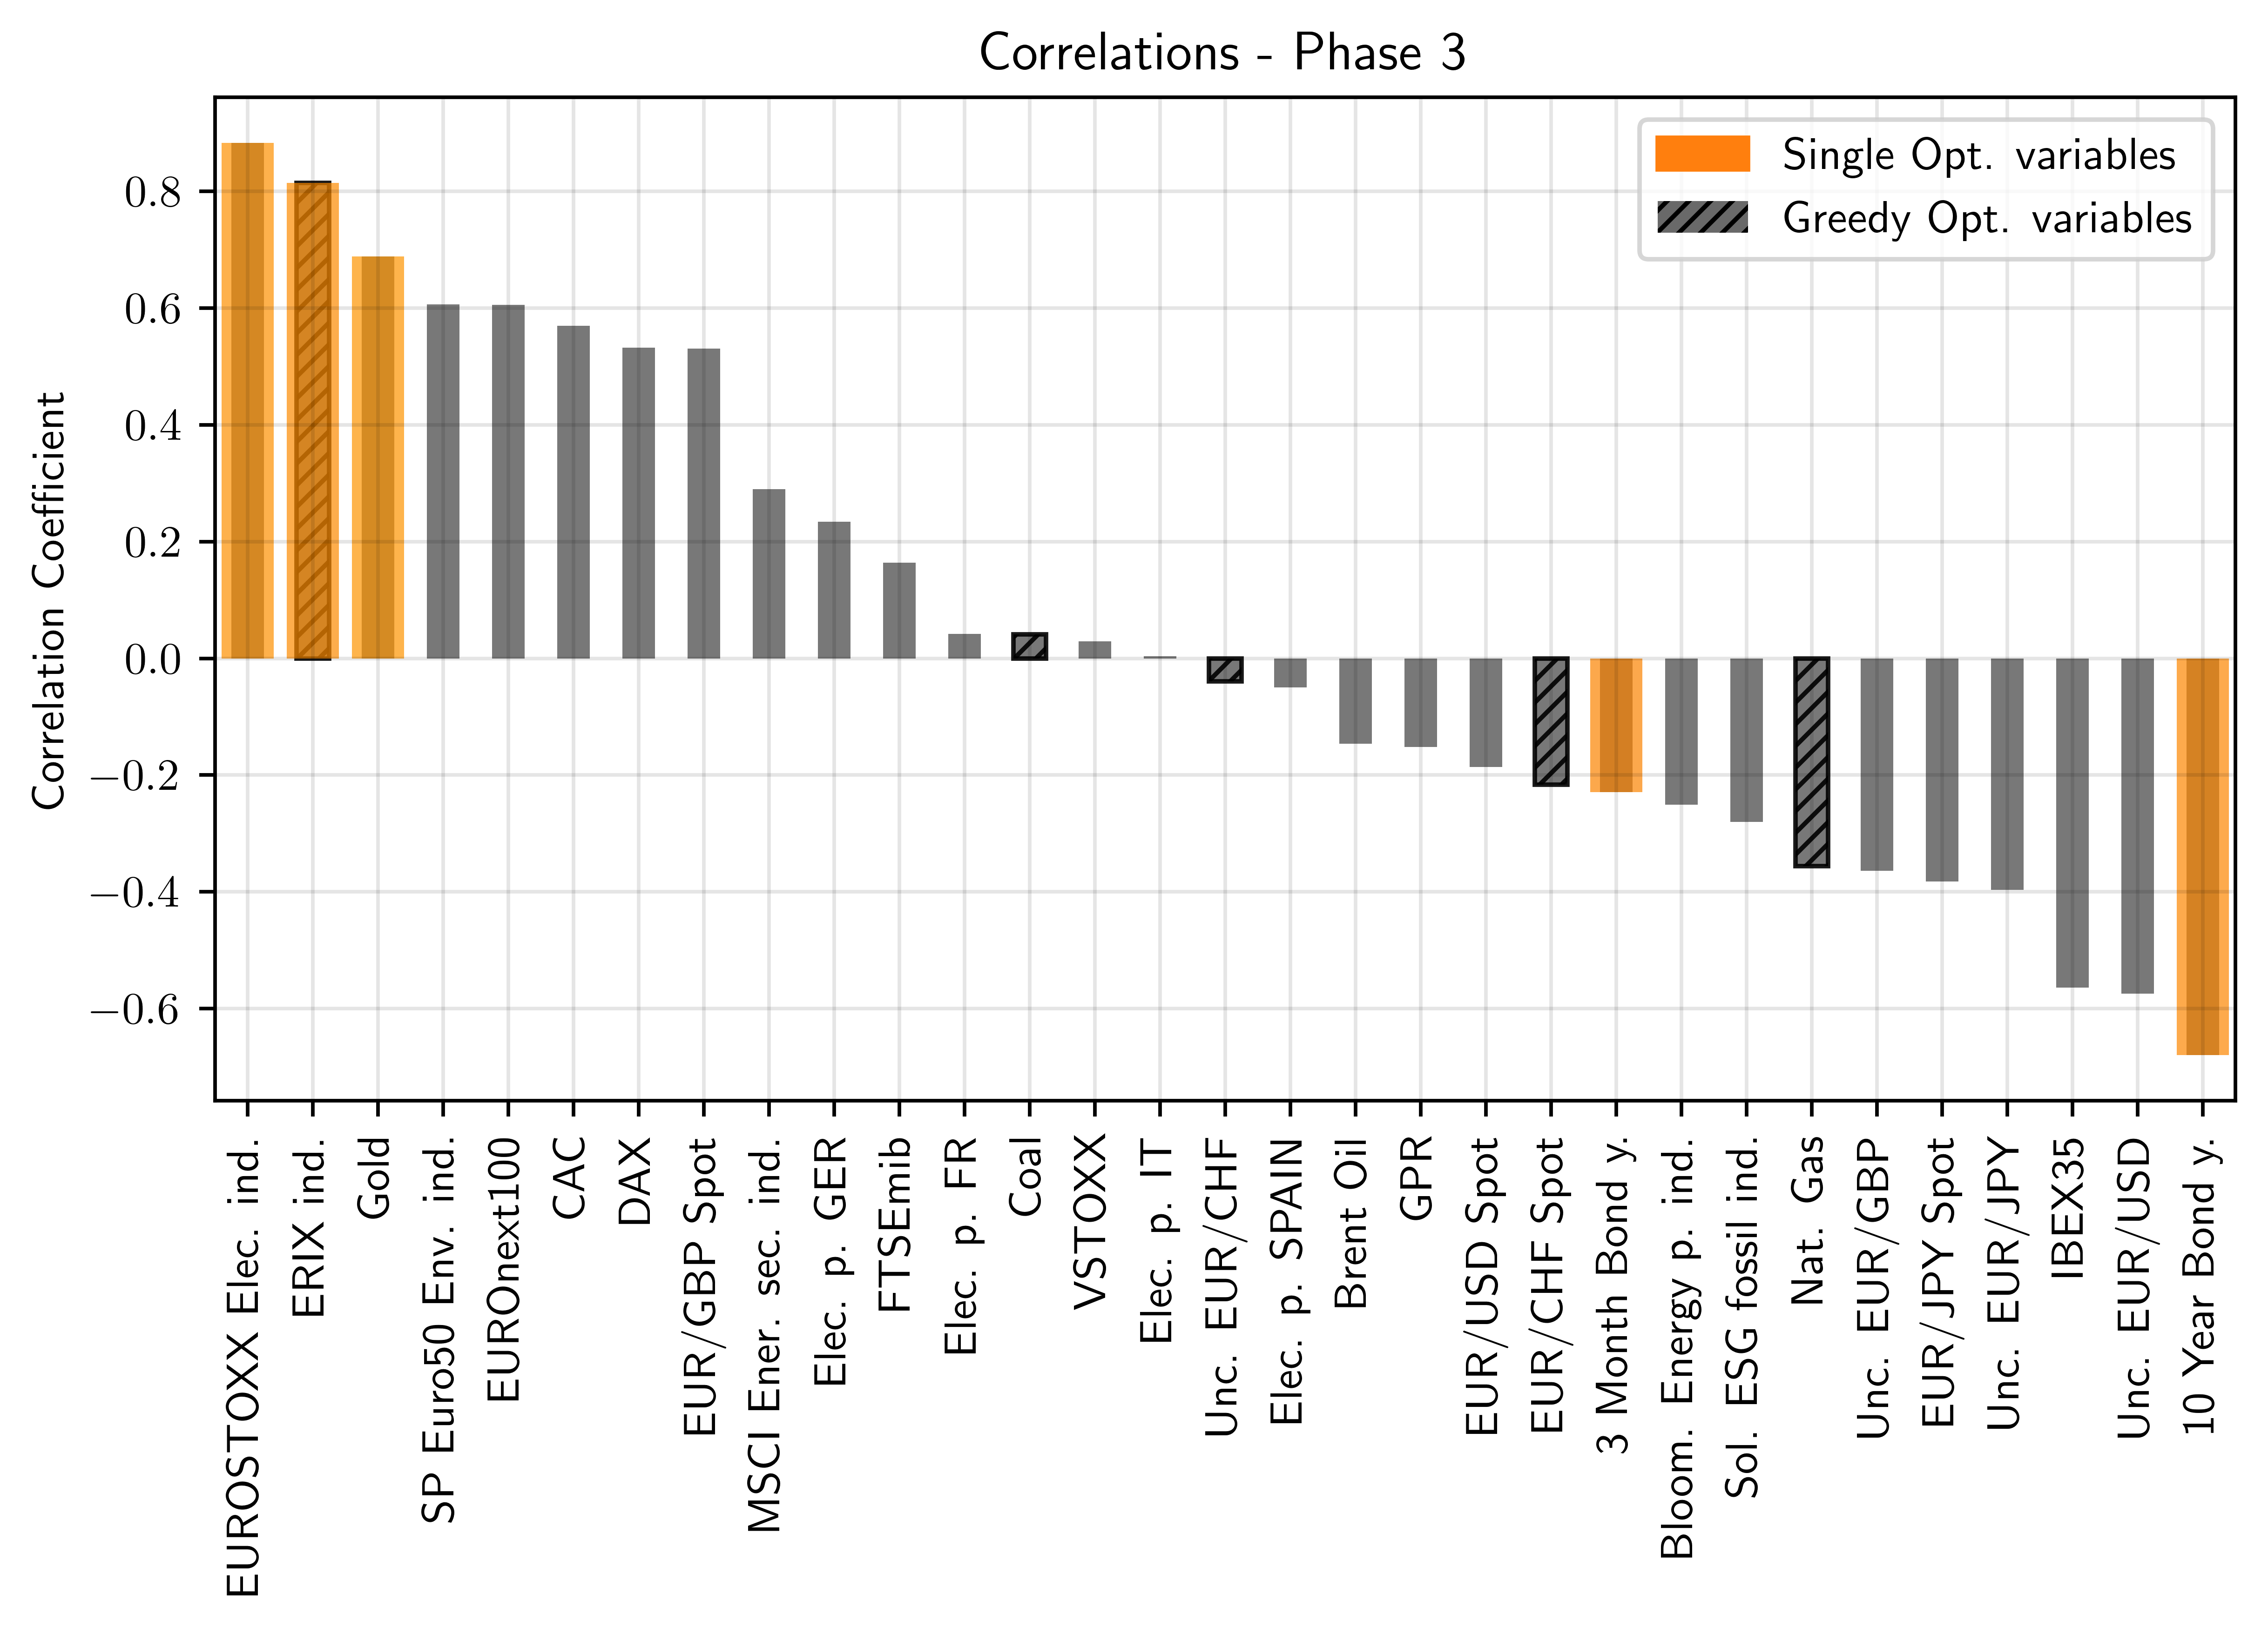

In [9]:
# Plot Phase 3 correlations
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
correlations_3.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(1, correlations_3[1], color=color1_3, alpha=0.7)
plt.bar(0, correlations_3[0], color=color1_4, alpha=0.7)
plt.bar(30, correlations_3[30], color=color1_2, alpha=0.7)
plt.bar(21, correlations_3[21], color=color1_1, alpha=0.7)
plt.bar(2, correlations_3[2], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 3')
ax = plt.gca()
ax.patches[1].set_hatch('/////')
ax.patches[12].set_hatch('/////')
ax.patches[24].set_hatch('/////')
ax.patches[15].set_hatch('/////')
ax.patches[20].set_hatch('/////')
ax.patches[1].set_edgecolor('k')
ax.patches[12].set_edgecolor('k')
ax.patches[24].set_edgecolor('k')
ax.patches[15].set_edgecolor('k')
ax.patches[20].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])

In this plot we present the correlations among the raw daily data towards EUA. The most informative single variables, obtained through II are highlighted in shades of orange. The dashed bars refers to the first 5 most informative variables obtain through a greedy selection algorithm for Phase 3.

### Phase 3: Information Imbalance analysis

In [10]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [11]:
# Define the color map for plots
NUM_COLORS1 = 31
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [12]:
# Load data
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [13]:
# Define the variable labels
labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [14]:
# Define the target and informative pool
y = df['eua_last']
y = y.values
y = y.reshape(-1,1)
X = df.iloc[:,3:]
X = X.values

# Standardize the data
scaler = StandardScaler()
y = scaler.fit_transform(y)
X = scaler.fit_transform(X)

In [15]:
# Define the Phase 3 subset
X_3 = X[:1782, :]
y_3 = y[:1782, :]

In [ ]:
# Define the Data instances and compute distances for target
d_y_3 = Data(y_3, maxk=y_3.shape[0]-1)
d_y_3.compute_distances()

# Define the Data instances and compute distances for informative pool
d_X_3 = Data(X_3, maxk=X_3.shape[0]-1)
d_X_3.compute_distances()

# Define the distance matrix for the informative pool
d_y3_dist_matrix = squareform(pdist(y_3, 'euclidean'))

# Define diffent types of imbalances
imbalance_old = _get_imbalance_from_d1_to_d2(d_X_3, d_y_3)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y_3, d_X_3)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X_3, d_y3_dist_matrix)

In [ ]:
# Compute the information imbalances from X to y
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X_3.shape[1]):
    d_3_i = Data(X_3[:, [i]], maxk=X_3.shape[0]-1)
    d_3_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_3_i, d_y_3))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_3_i, d_y3_dist_matrix))

In [ ]:
# Compute the information imbalances from y to X
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X_3.shape[1]):
    X_3_i = X_3[:, [i]]
    d_x_3_i = squareform(pdist(X_3_i, 'euclidean'))
    d_3 = Data(y_3, maxk=y_3.shape[0]-1)
    d_3.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d_3, d_X_3))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d_3, d_x_3_i))

In [19]:
# Sort the imbalances
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]

In [20]:
# Arange results for plotting
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((31,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

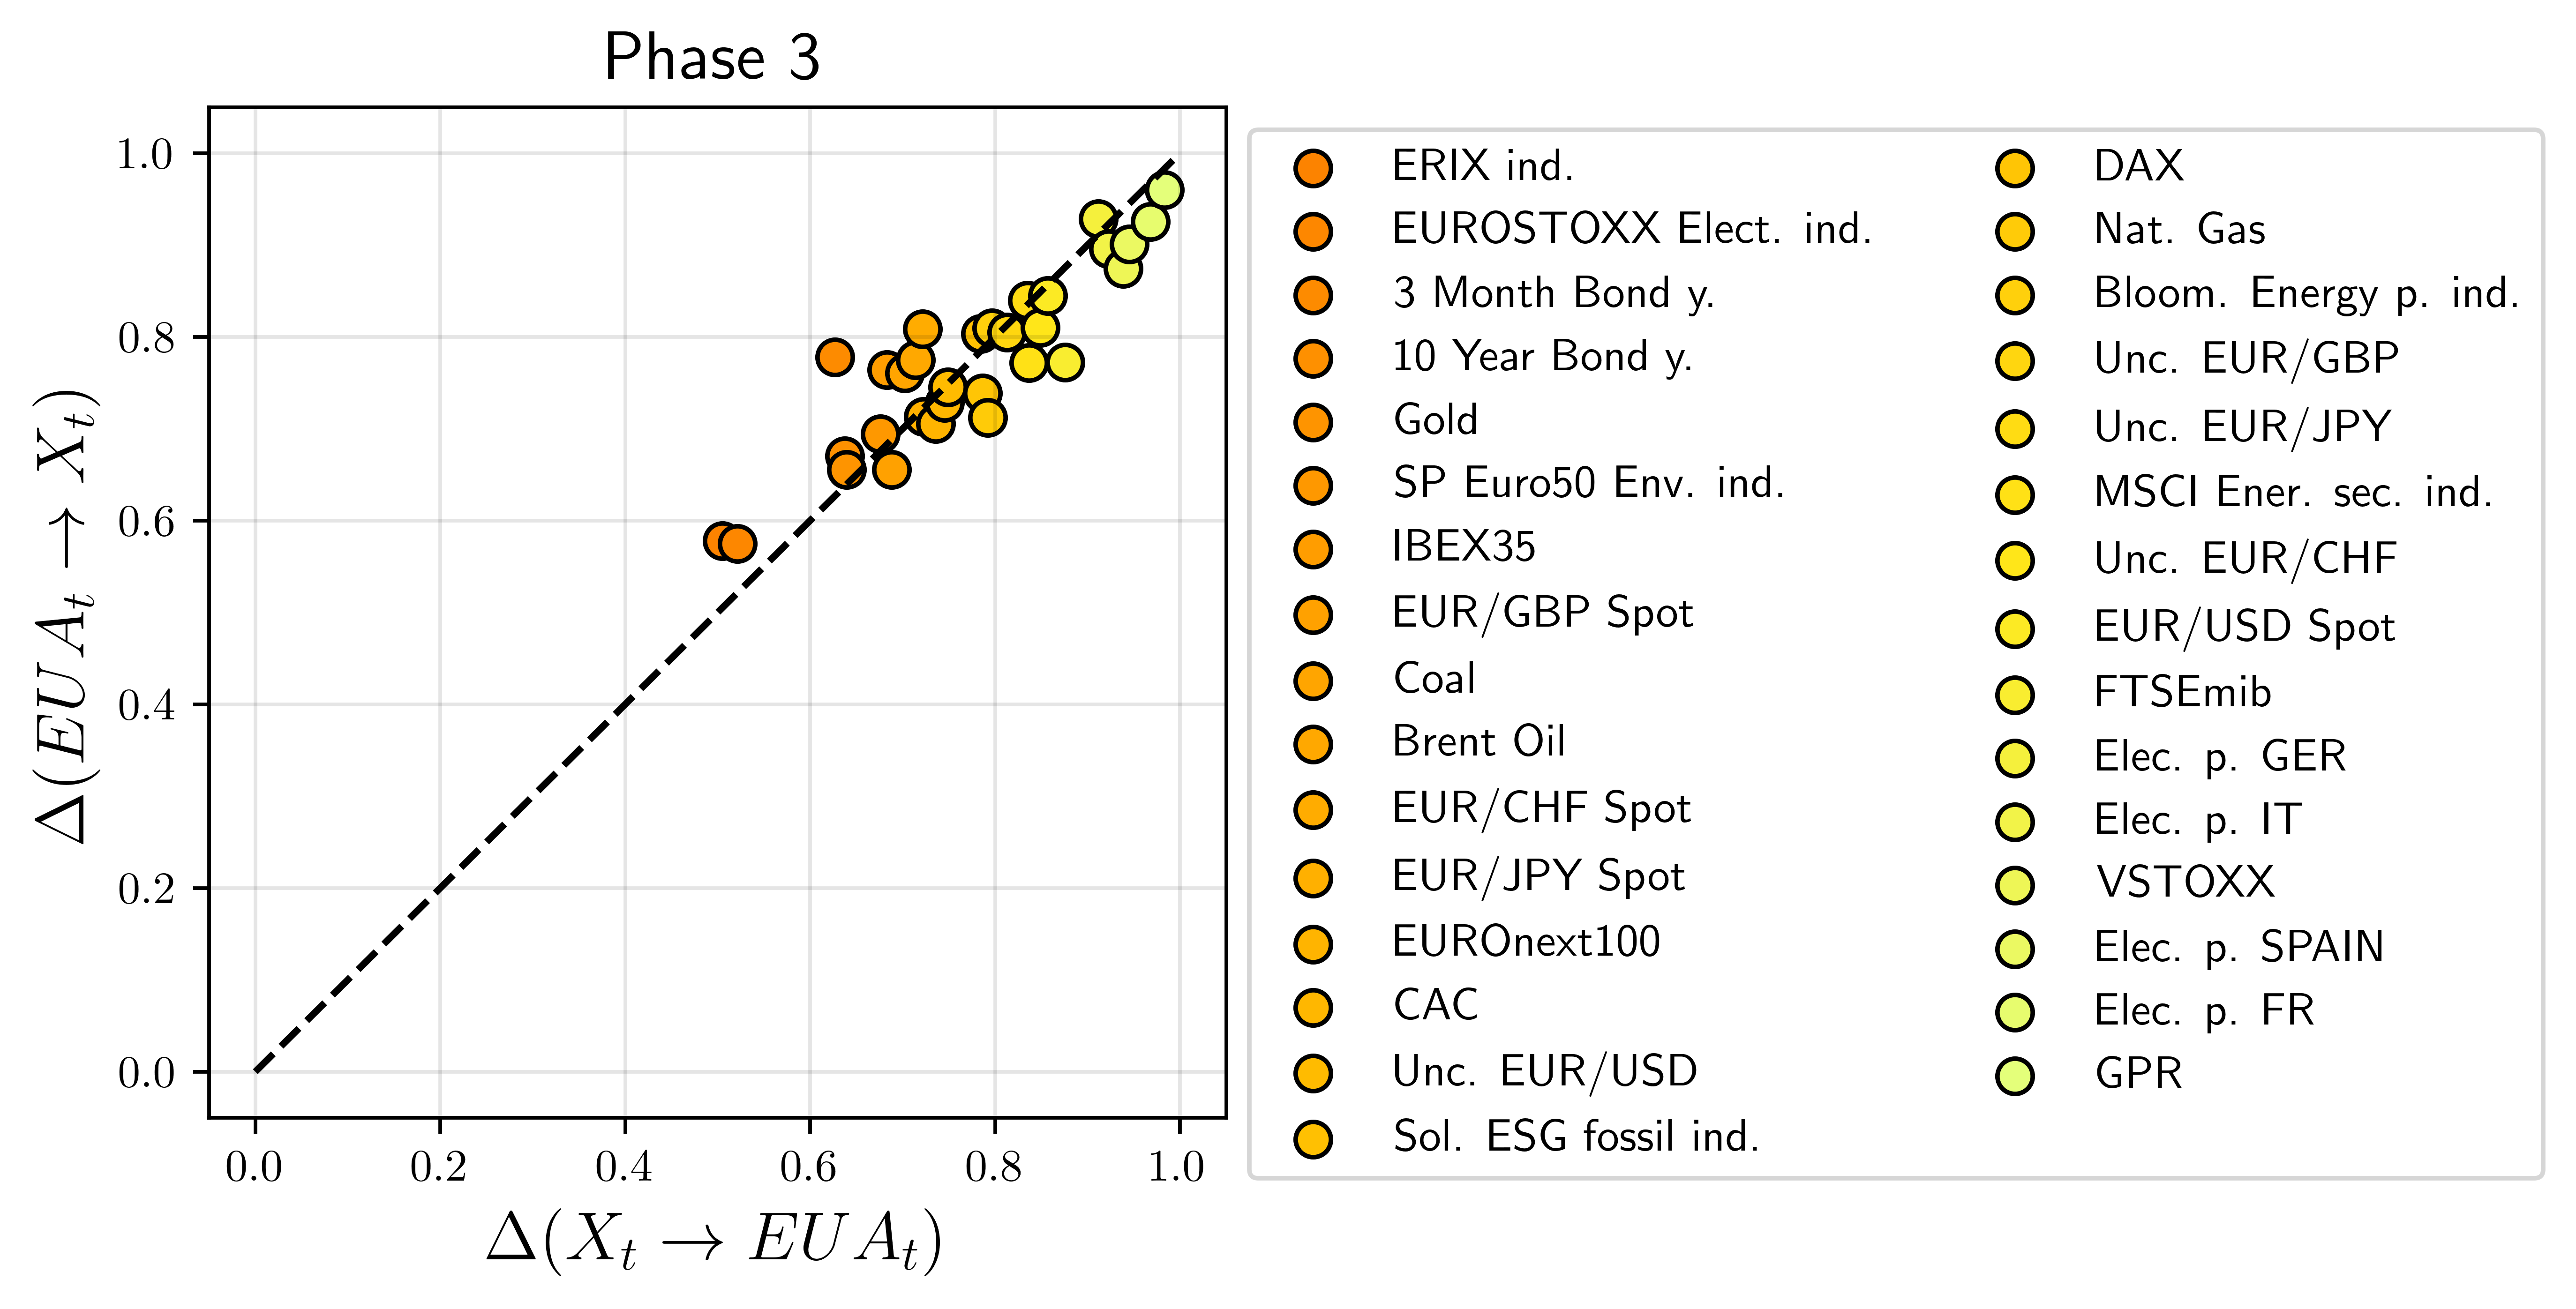

In [21]:
# Plot the Phase 3 imbalances
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 3', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)

This plot analyses the information content of each variable in our dataset taken individually. The legend is order
from the most informative (darker orange) to the less informative variables (yellow orange) for Phase 3.

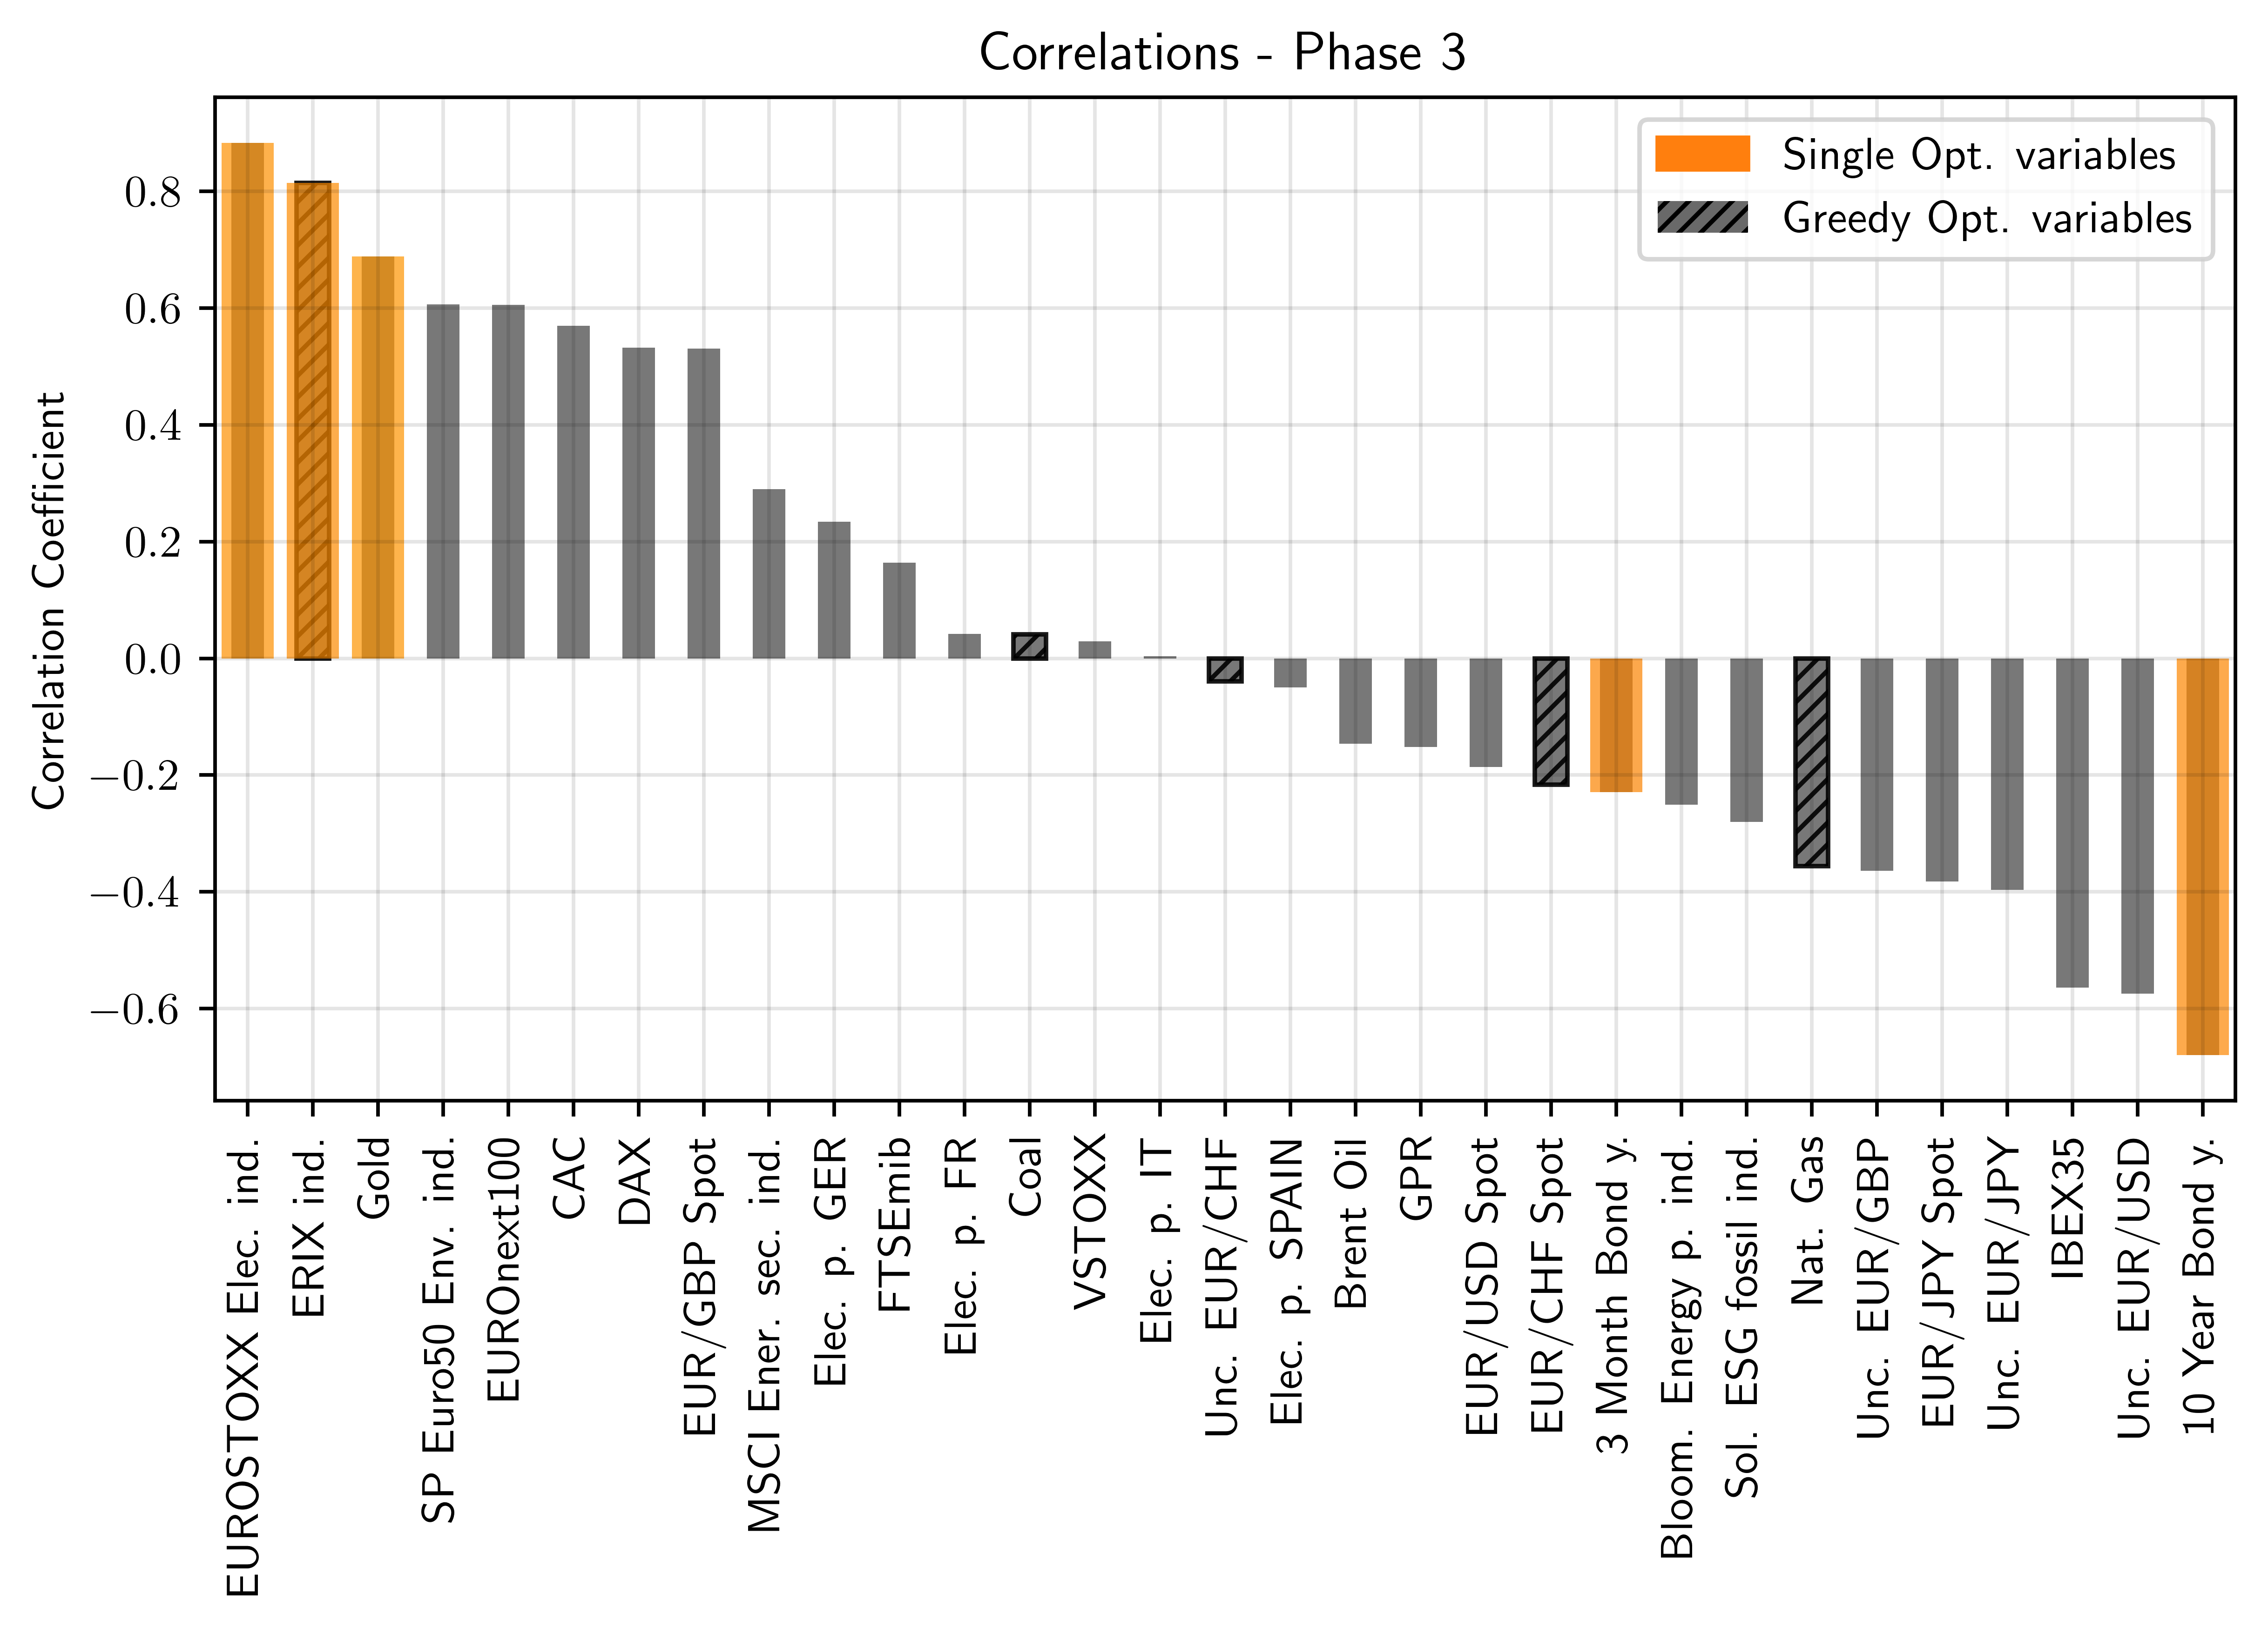

In [22]:
# Phase 3 correlations for comparison
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
correlations_3.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(1, correlations_3[1], color=color1_3, alpha=0.7)
plt.bar(0, correlations_3[0], color=color1_4, alpha=0.7)
plt.bar(30, correlations_3[30], color=color1_2, alpha=0.7)
plt.bar(21, correlations_3[21], color=color1_1, alpha=0.7)
plt.bar(2, correlations_3[2], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 3')
ax = plt.gca()
ax.patches[1].set_hatch('/////')
ax.patches[12].set_hatch('/////')
ax.patches[24].set_hatch('/////')
ax.patches[15].set_hatch('/////')
ax.patches[20].set_hatch('/////')
ax.patches[1].set_edgecolor('k')
ax.patches[12].set_edgecolor('k')
ax.patches[24].set_edgecolor('k')
ax.patches[15].set_edgecolor('k')
ax.patches[20].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])

***

In [23]:
%reset -f

## Phase 4

### Phase 4: Correlations

In [24]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from datetime import datetime
from matplotlib.dates import date2num
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

plt.rcParams['text.usetex'] = True

In [25]:
# Load data
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [26]:
# Define target variable and datetime
df_ = df.drop(df.columns[[0,1]], axis=1)
target = df['eua_last']
target_ = target.values
date = df['Date']

In [27]:
# Define the variable labels
X_labels = np.array(['EUA','GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elec. ind.', '10 Year Bond y.', '3 Month Bond y.'])
df_.columns = X_labels

In [28]:
# Define the Phase 4 subset and calculate the correlations towards EUA
X_4 = df_.iloc[1782:,]
correlations_4 = X_4.corrwith(df_["EUA"])
correlations_4 = correlations_4.sort_values(ascending=False)
correlations_4 = correlations_4[1:]

In [29]:
# Plotting parameters
NUM_COLORS1 = 31
cm = plt.get_cmap('Wistia')
colors1 = [cm(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

color1_1 = colors1_test[0]
color1_2 = colors1_test[1]
color1_3 = colors1_test[2]
color1_4 = colors1_test[3]
color1_5 = colors1_test[4]

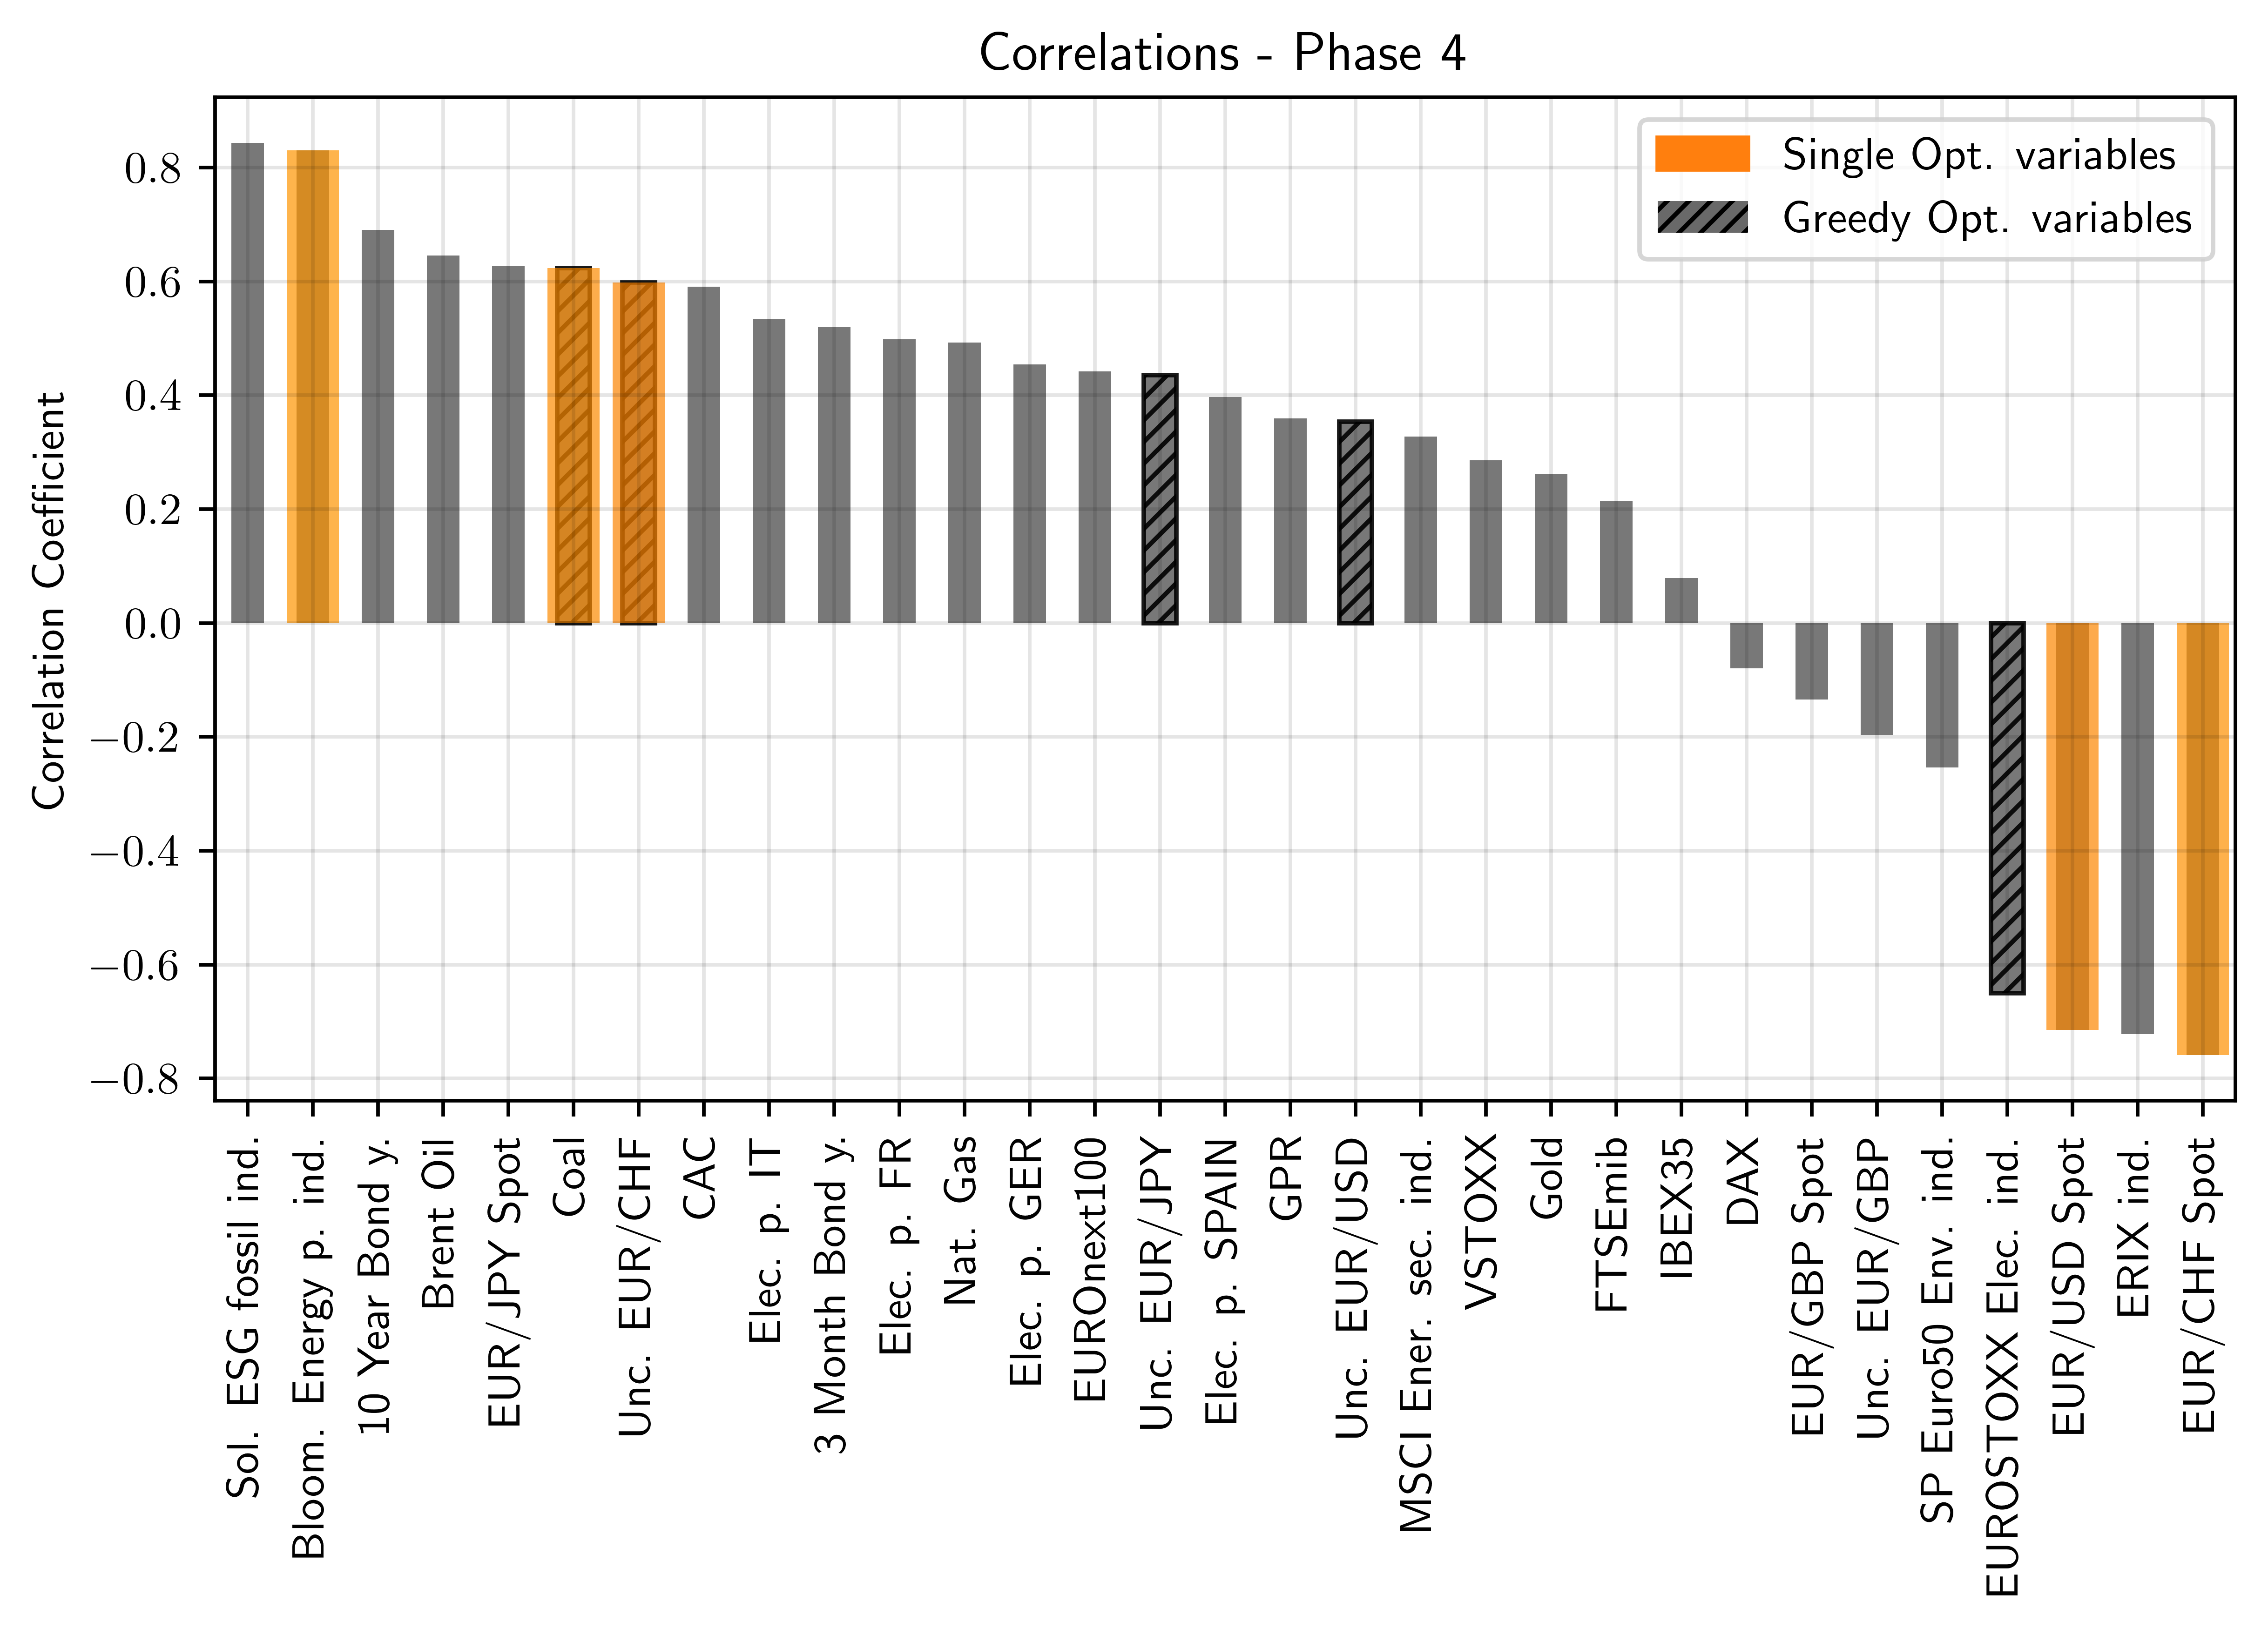

In [30]:
# Plot Phase 4 correlations
plt.figure(figsize=(4,4), dpi = 700)
correlations_4.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(6, correlations_4[6], color=color1_1, alpha=0.7)
plt.bar(28, correlations_4[28], color=color1_2, alpha=0.7)
plt.bar(5, correlations_4[5], color=color1_3, alpha=0.7)
plt.bar(30, correlations_4[30], color=color1_4, alpha=0.7)
plt.bar(1, correlations_4[1], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 4')
ax = plt.gca()
ax.patches[6].set_hatch('/////')
ax.patches[17].set_hatch('/////')
ax.patches[5].set_hatch('/////')
ax.patches[14].set_hatch('/////')
ax.patches[27].set_hatch('/////')
ax.patches[6].set_edgecolor('k')
ax.patches[17].set_edgecolor('k')
ax.patches[5].set_edgecolor('k')
ax.patches[14].set_edgecolor('k')
ax.patches[27].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])

In this plot we present the correlations among the raw daily data towards EUA. The most informative single variables, obtained through II are highlighted in shades of orange. The dashed bars refers to the first 5 most informative variables obtain through a greedy selection algorithm for Phase 4.

### Phase 4: Information Imbalance analysis

In [31]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [32]:
# Define the color map for plots
NUM_COLORS1 = 31
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [33]:
# Load data
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

# Define the target and informative pool
y = df['eua_last']
y = y.values
y = y.reshape(-1,1)
X = df.iloc[:,3:]
X = X.values

# Standardize the data
scaler = StandardScaler()
y = scaler.fit_transform(y)
X = scaler.fit_transform(X)

In [34]:
# Define labels
labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [35]:
# Define the Phase 4 subset
X_4 = X[1782:,:]
y_4 = y[1782:,:]

In [ ]:
# Define the Data instances and compute distances for target
d_y_4 = Data(y_4, maxk=y_4.shape[0]-1)
d_y_4.compute_distances()

# Define the Data instances and compute distances for informative pool
d_X_4 = Data(X_4, maxk=X_4.shape[0]-1)
d_X_4.compute_distances()

# Define the distance matrix for the informative pool
d_y4_dist_matrix = squareform(pdist(y_4, 'euclidean'))

# Define diffent types of imbalances
imbalance_old = _get_imbalance_from_d1_to_d2(d_X_4, d_y_4)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y_4, d_X_4)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X_4, d_y4_dist_matrix)

In [ ]:
# Compute the information imbalances from X to y
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X_4.shape[1]):
    d_4_i = Data(X_4[:, [i]], maxk=X_4.shape[0]-1)
    d_4_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_4_i, d_y_4))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_4_i, d_y4_dist_matrix))

In [ ]:
# Compute the information imbalances from y to X
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X_4.shape[1]):
    X_4_i = X_4[:, [i]]
    d_x_4_i = squareform(pdist(X_4_i, 'euclidean'))
    d_4 = Data(y_4, maxk=y_4.shape[0]-1)
    d_4.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d_4, d_X_4))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d_4, d_x_4_i))

In [39]:
# Sort the imbalances
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]

In [40]:
# Arange results for plotting
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((31,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

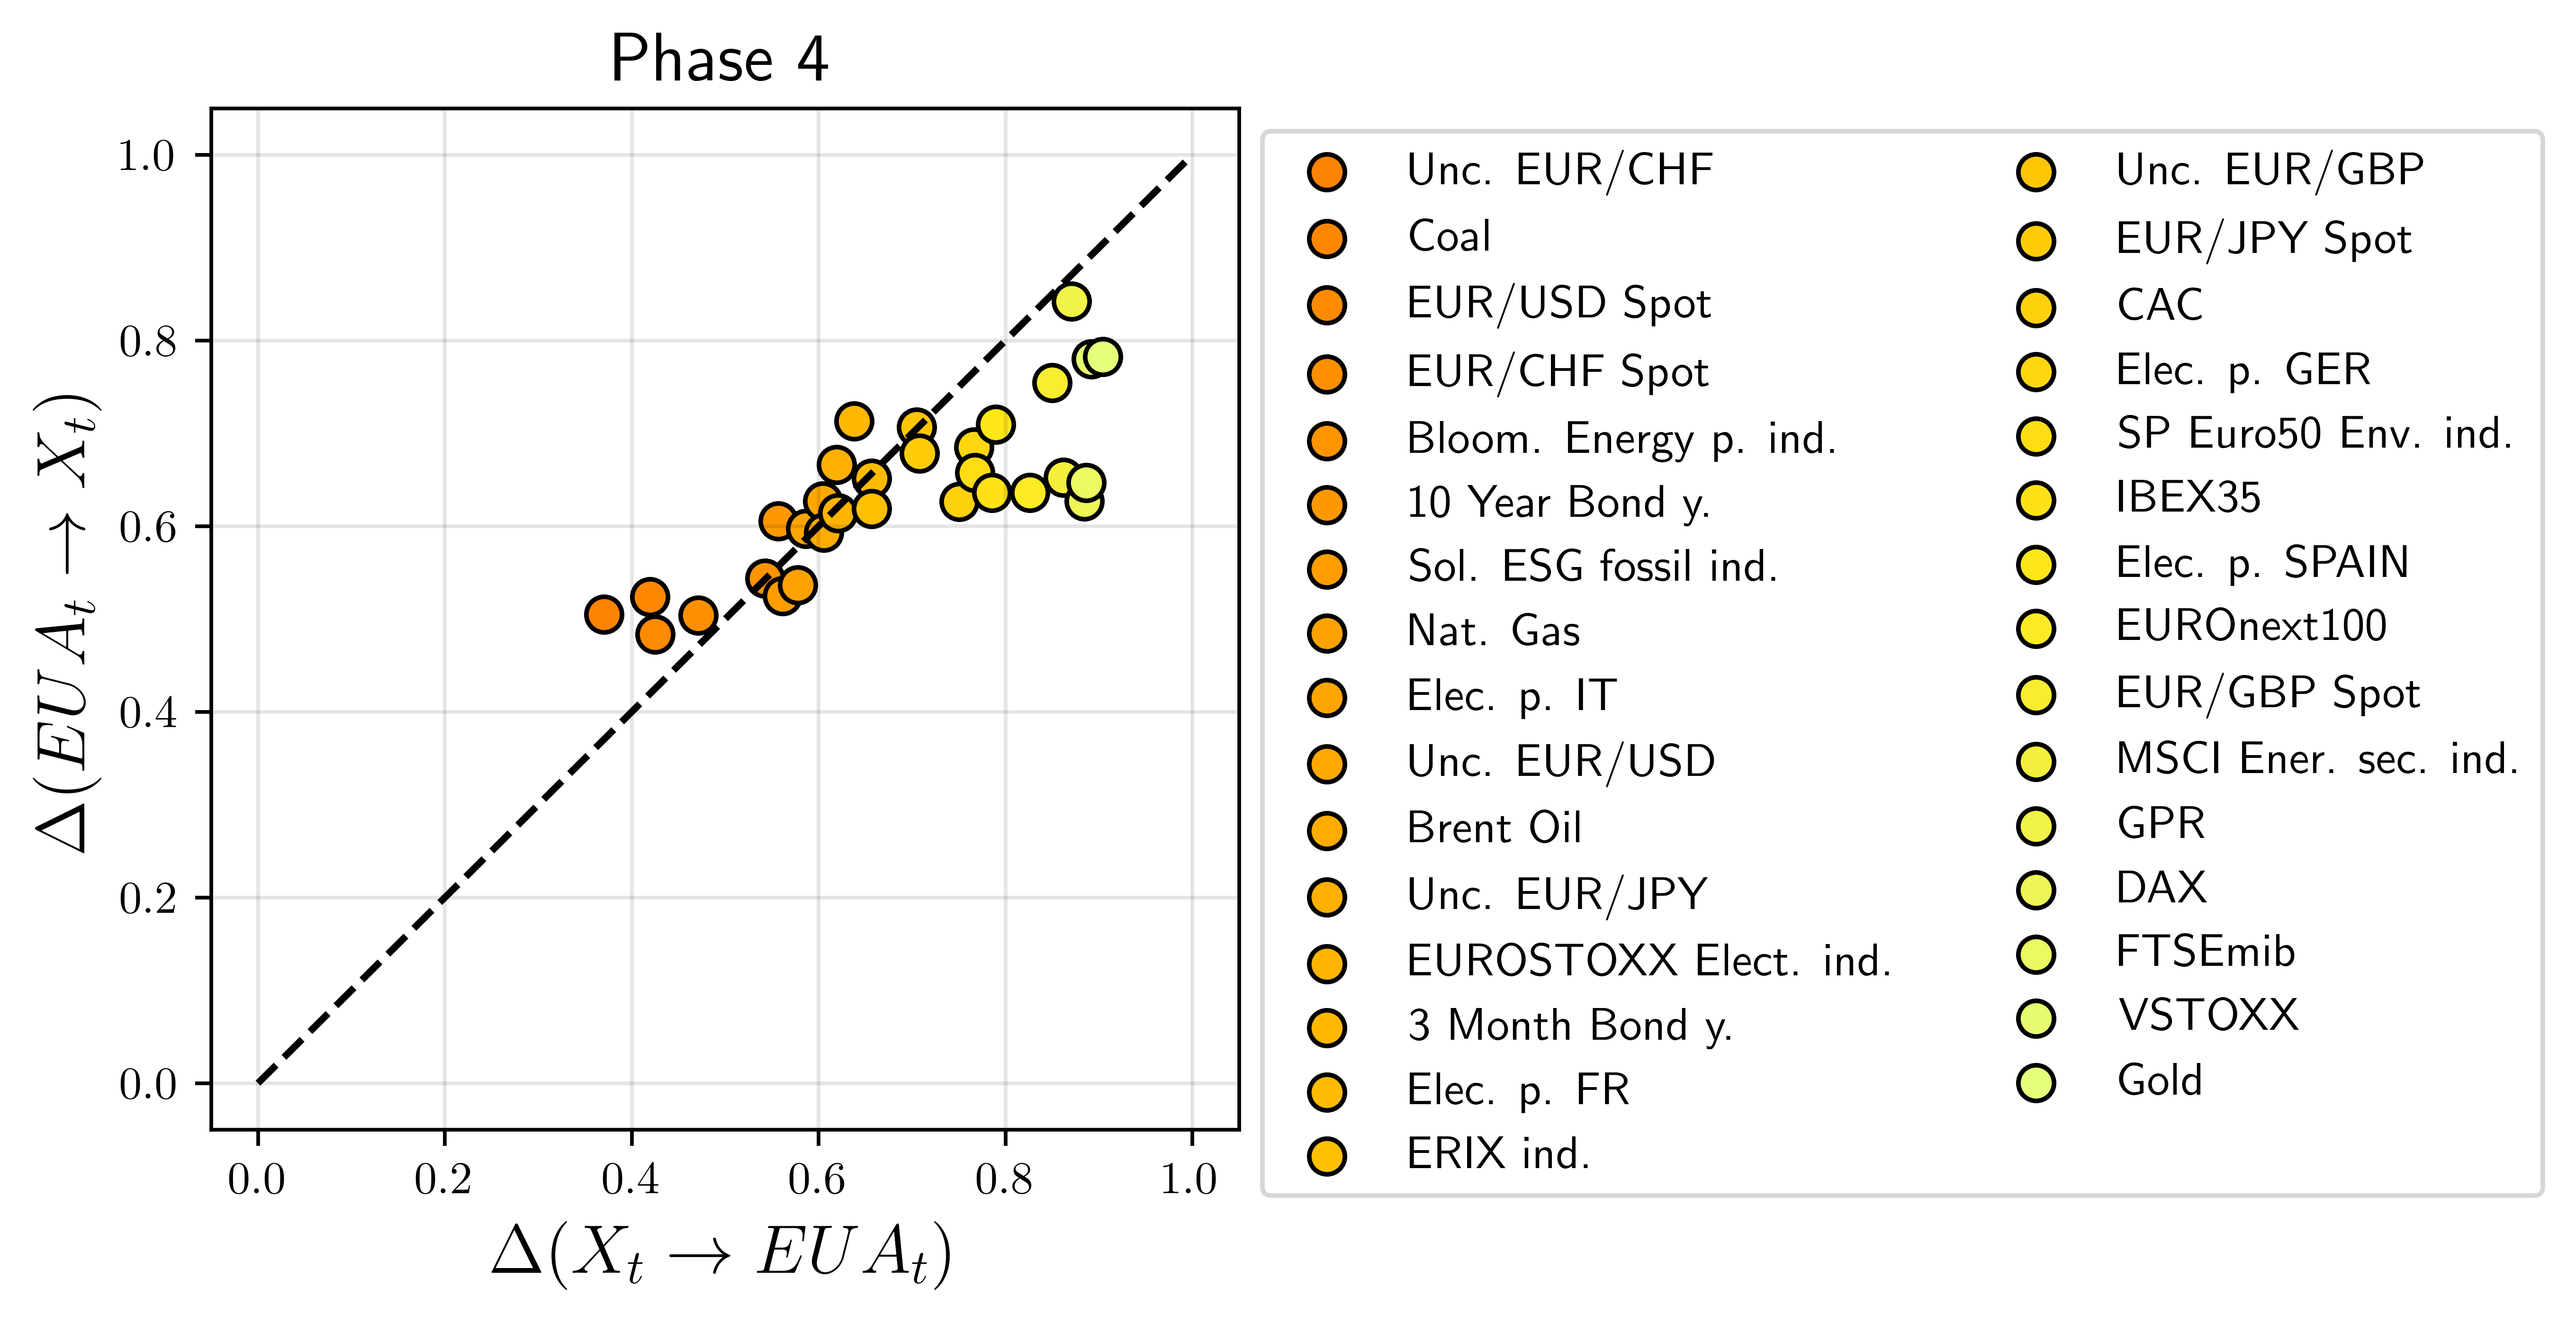

In [41]:
# Plot the Phase 4 imbalances
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 4', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)

This plot analyses the information content of each variable in our dataset taken individually. The legend is order
from the most informative (darker orange) to the less informative variables (yellow orange) for Phase 4.

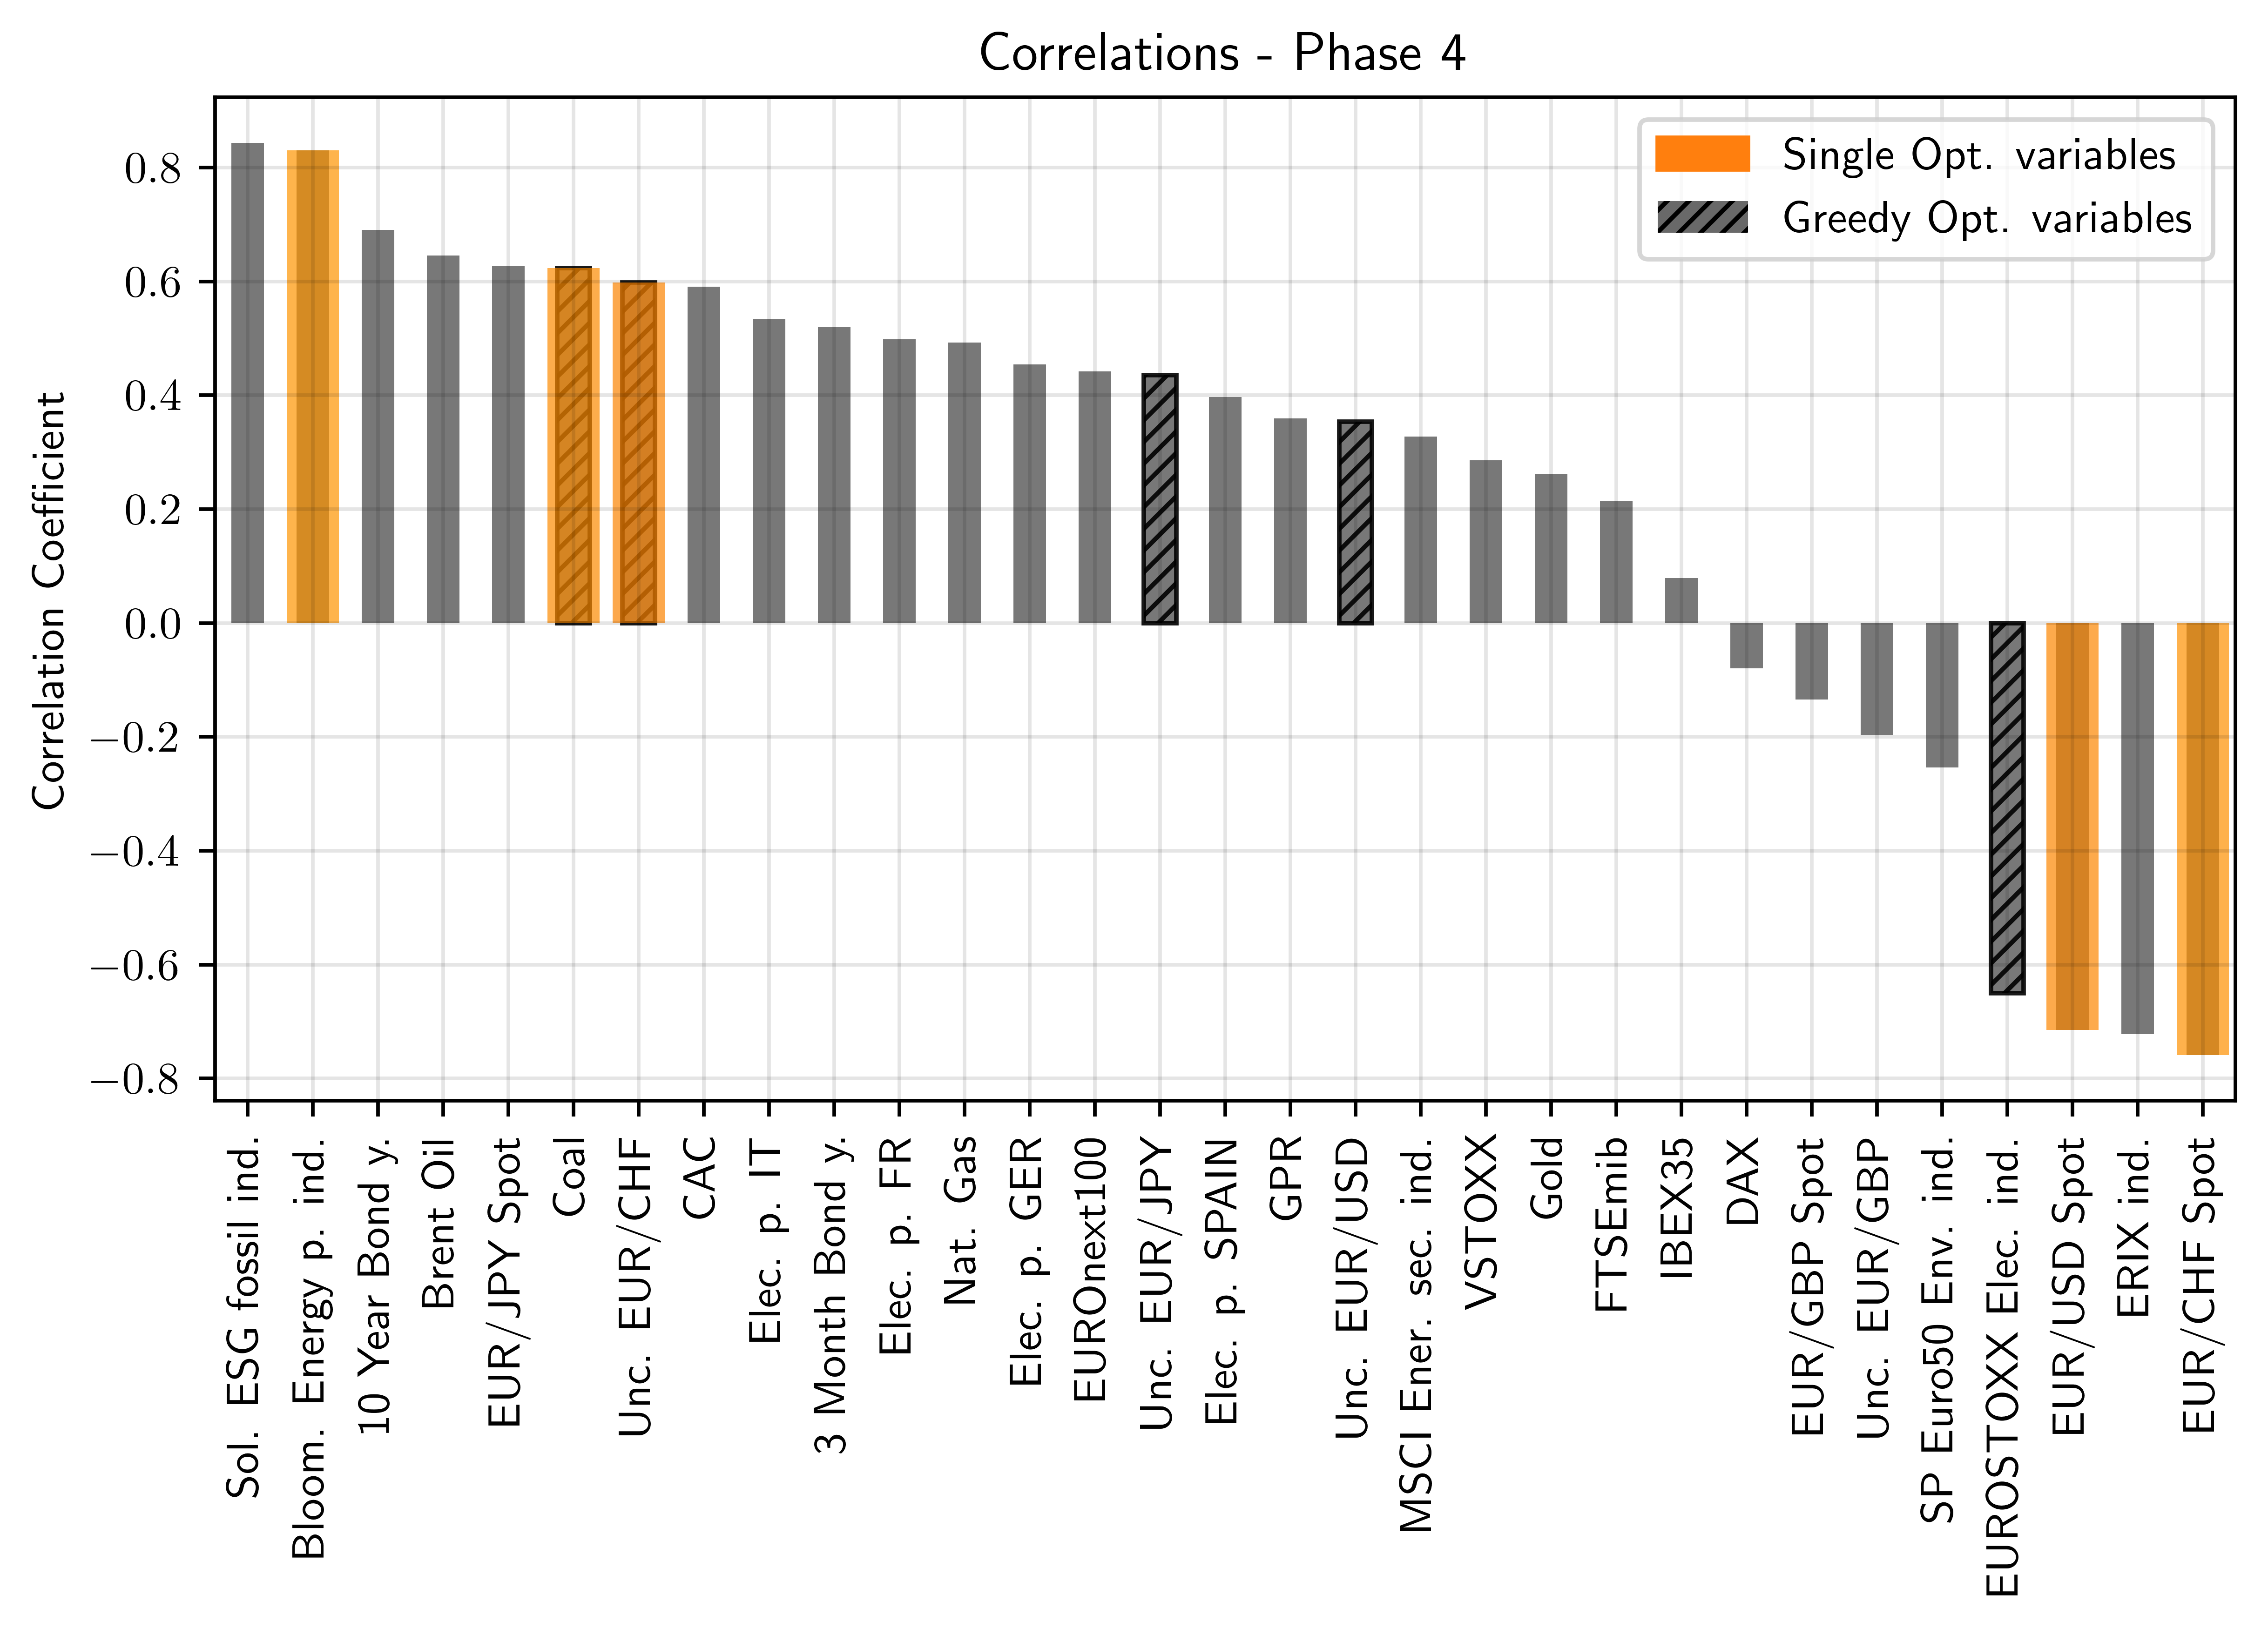

In [42]:
# Phase 4 correlations for comparison
plt.figure(figsize=(4,4), dpi = 700)
correlations_4.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(6, correlations_4[6], color=color1_1, alpha=0.7)
plt.bar(28, correlations_4[28], color=color1_2, alpha=0.7)
plt.bar(5, correlations_4[5], color=color1_3, alpha=0.7)
plt.bar(30, correlations_4[30], color=color1_4, alpha=0.7)
plt.bar(1, correlations_4[1], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 4')
ax = plt.gca()
ax.patches[6].set_hatch('/////')
ax.patches[17].set_hatch('/////')
ax.patches[5].set_hatch('/////')
ax.patches[14].set_hatch('/////')
ax.patches[27].set_hatch('/////')
ax.patches[6].set_edgecolor('k')
ax.patches[17].set_edgecolor('k')
ax.patches[5].set_edgecolor('k')
ax.patches[14].set_edgecolor('k')
ax.patches[27].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])